# Scatter Plots & Pair Plots in Python
Scatter plots visualize the relationship between two continuous variables, revealing correlations, clusters, and outliers. Pair plots extend this by showing all pairwise relationships in a dataset, making them essential for multivariate exploratory data analysis (EDA).

## Basic Scatter Plot with Matplotlib

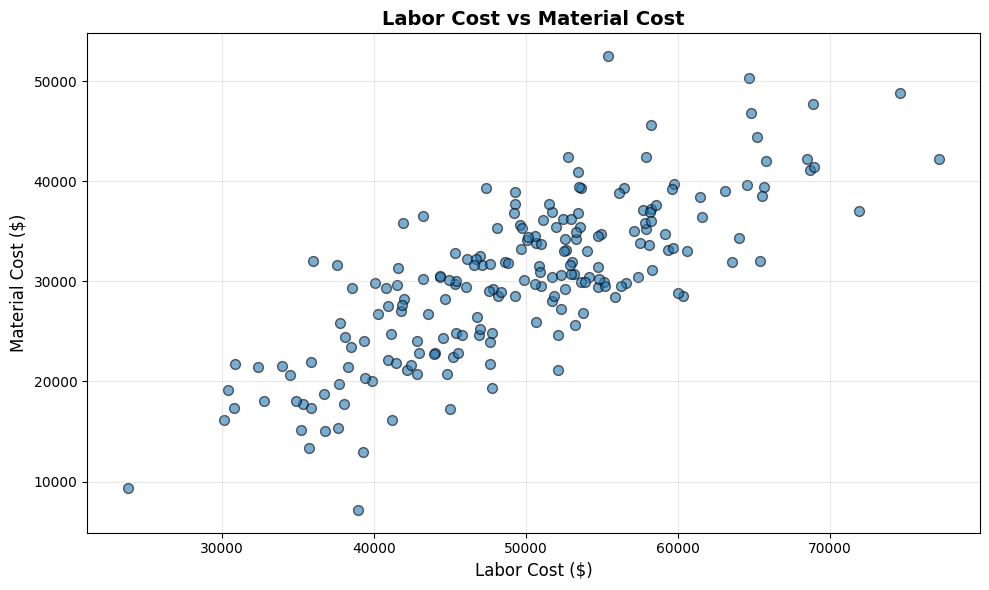

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
n = 200

# Create correlated variables
labor_cost = np.random.normal(50000, 10000, n)
material_cost = 0.6 * labor_cost + np.random.normal(0, 5000, n)

# Basic scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(labor_cost, material_cost, alpha=0.6, edgecolors='black', s=50)
plt.xlabel('Labor Cost ($)', fontsize=12)
plt.ylabel('Material Cost ($)', fontsize=12)
plt.title('Labor Cost vs Material Cost', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Size, Color, and Transparency


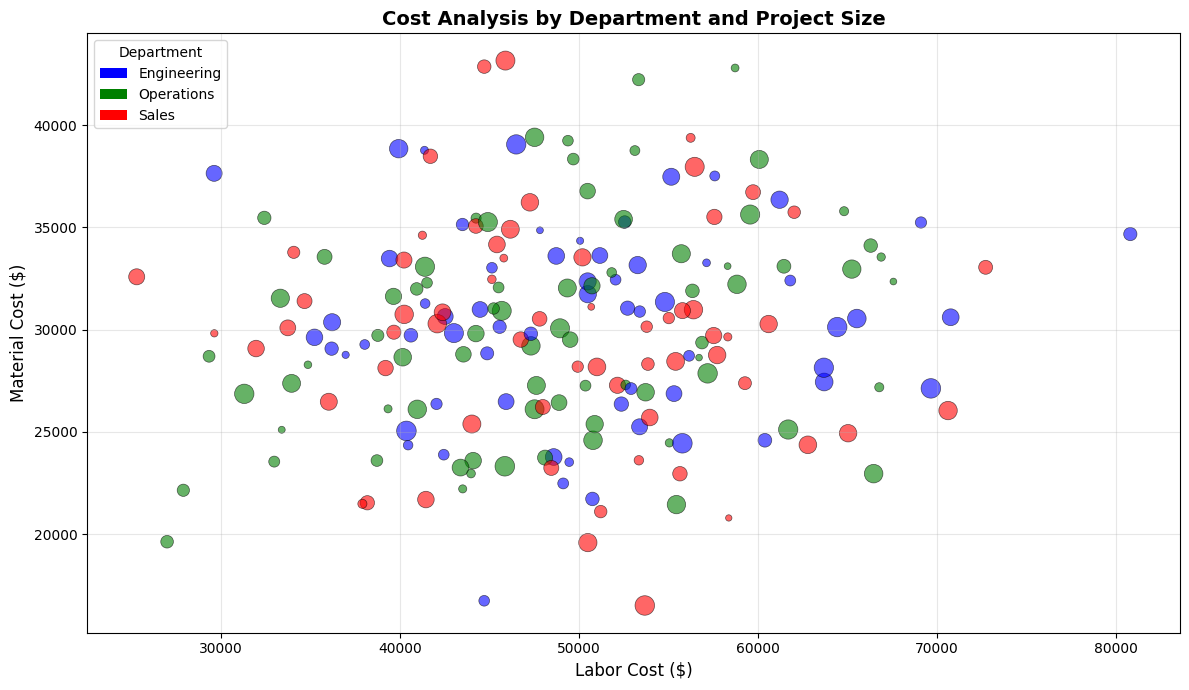

In [2]:
# Create sample data with categories
df = pd.DataFrame({
    'labor_cost': np.random.normal(50000, 10000, 200),
    'material_cost': np.random.normal(30000, 5000, 200),
    'project_size': np.random.uniform(10, 100, 200),  # For size
    'department': np.random.choice(['Engineering', 'Operations', 'Sales'], 200)
})

# Map departments to colors
color_map = {'Engineering': 'blue', 'Operations': 'green', 'Sales': 'red'}
colors = df['department'].map(color_map)

# Scatter plot with size and color
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df['labor_cost'],
    df['material_cost'],
    s=df['project_size']*2,  # Size based on project_size
    c=colors,                 # Color by department
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel('Labor Cost ($)', fontsize=12)
plt.ylabel('Material Cost ($)', fontsize=12)
plt.title('Cost Analysis by Department and Project Size', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[dept], label=dept)
                   for dept in color_map.keys()]
plt.legend(handles=legend_elements, title='Department', loc='upper left')

plt.tight_layout()
plt.show()

# Adding Regression Line

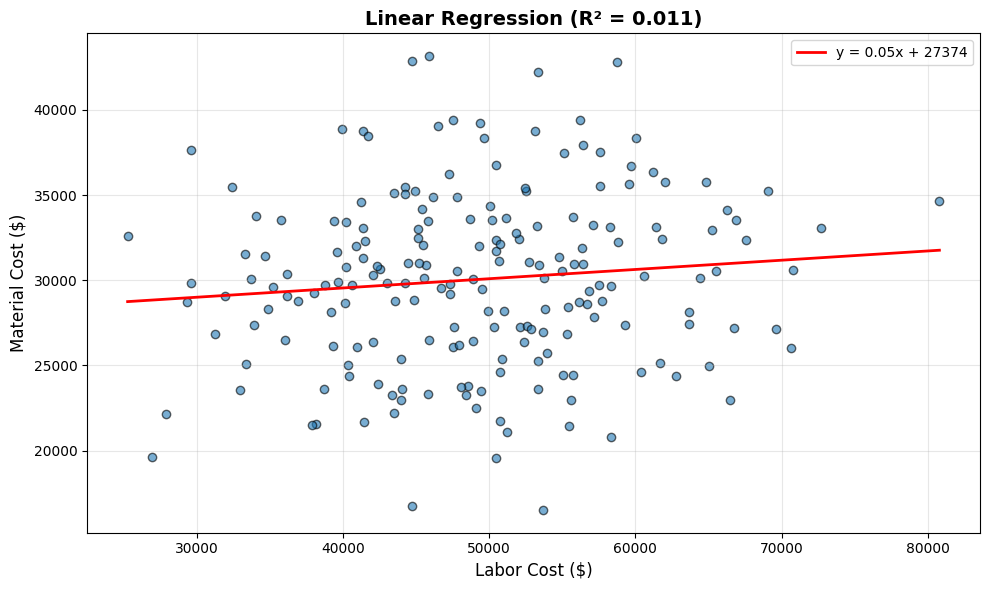

Correlation coefficient (r): 0.106
R-squared: 0.011
P-value: 1.3536e-01


In [3]:
from scipy import stats

# Calculate regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['labor_cost'],
    df['material_cost']
)

# Create line
line_x = np.array([df['labor_cost'].min(), df['labor_cost'].max()])
line_y = slope * line_x + intercept

# Plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['labor_cost'], df['material_cost'], alpha=0.6, edgecolors='black')
plt.plot(line_x, line_y, 'r-', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.0f}')
plt.xlabel('Labor Cost ($)', fontsize=12)
plt.ylabel('Material Cost ($)', fontsize=12)
plt.title(f'Linear Regression (R² = {r_value**2:.3f})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient (r): {r_value:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4e}")

Scatter Plots with Seaborn

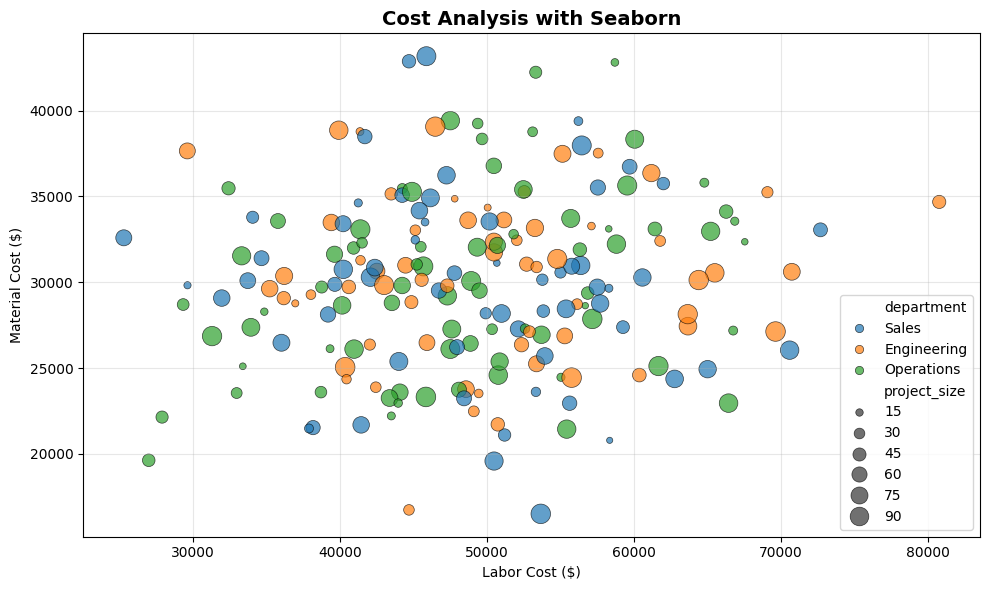

In [8]:
import seaborn as sns

# Basic seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='labor_cost',
    y='material_cost',
    hue='department',      # Color by category
    size='project_size',   # Size by variable
    sizes=(20, 200),       # Size range
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Cost Analysis with Seaborn', fontsize=14, fontweight='bold')
plt.xlabel('Labor Cost ($)')
plt.ylabel('Material Cost ($)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Scatter Plot with Regression Line (Seaborn)

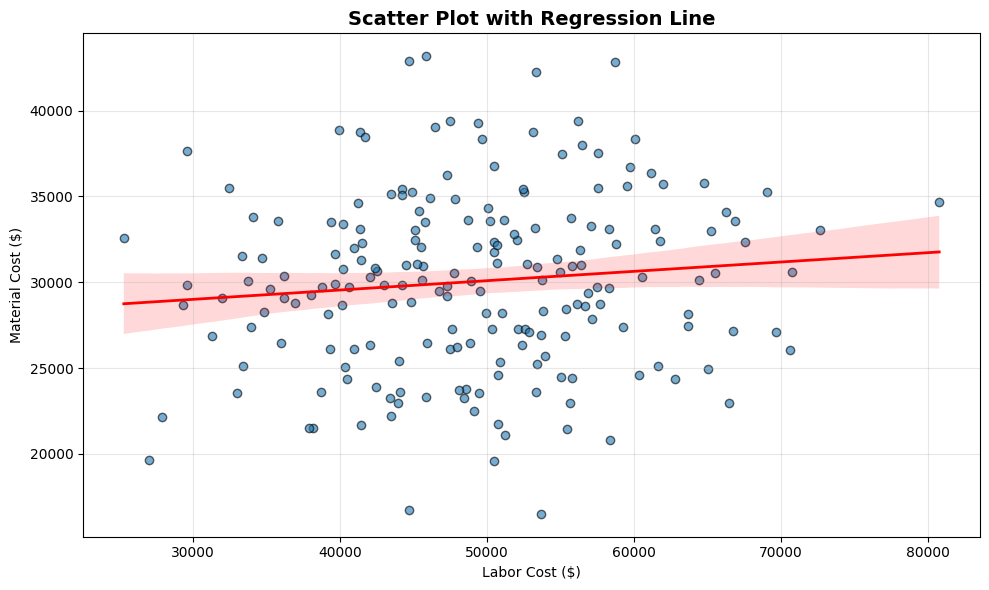

In [10]:
# Seaborn regplot - automatically adds regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='labor_cost',
    y='material_cost',
    scatter_kws={'alpha': 0.6, 'edgecolors': 'black'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Scatter Plot with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Labor Cost ($)')
plt.ylabel('Material Cost ($)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# LM Plot - Regression by Category

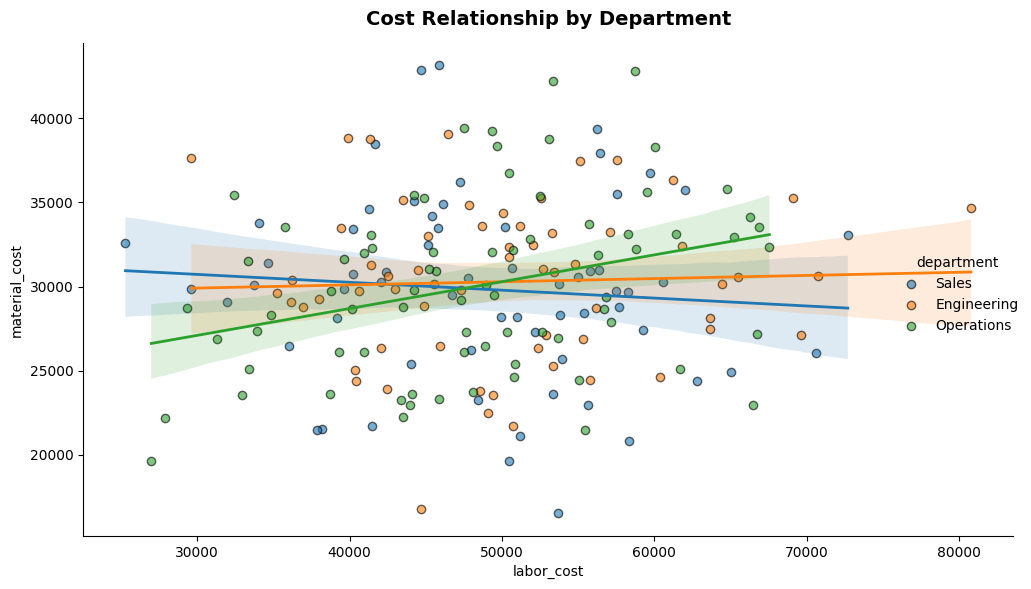

In [11]:
# Separate regression lines for each department
g = sns.lmplot(
    data=df,
    x='labor_cost',
    y='material_cost',
    hue='department',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 'edgecolors': 'black'},
    line_kws={'linewidth': 2}
)
plt.title('Cost Relationship by Department', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Multiple Scatter Plots in Subplots


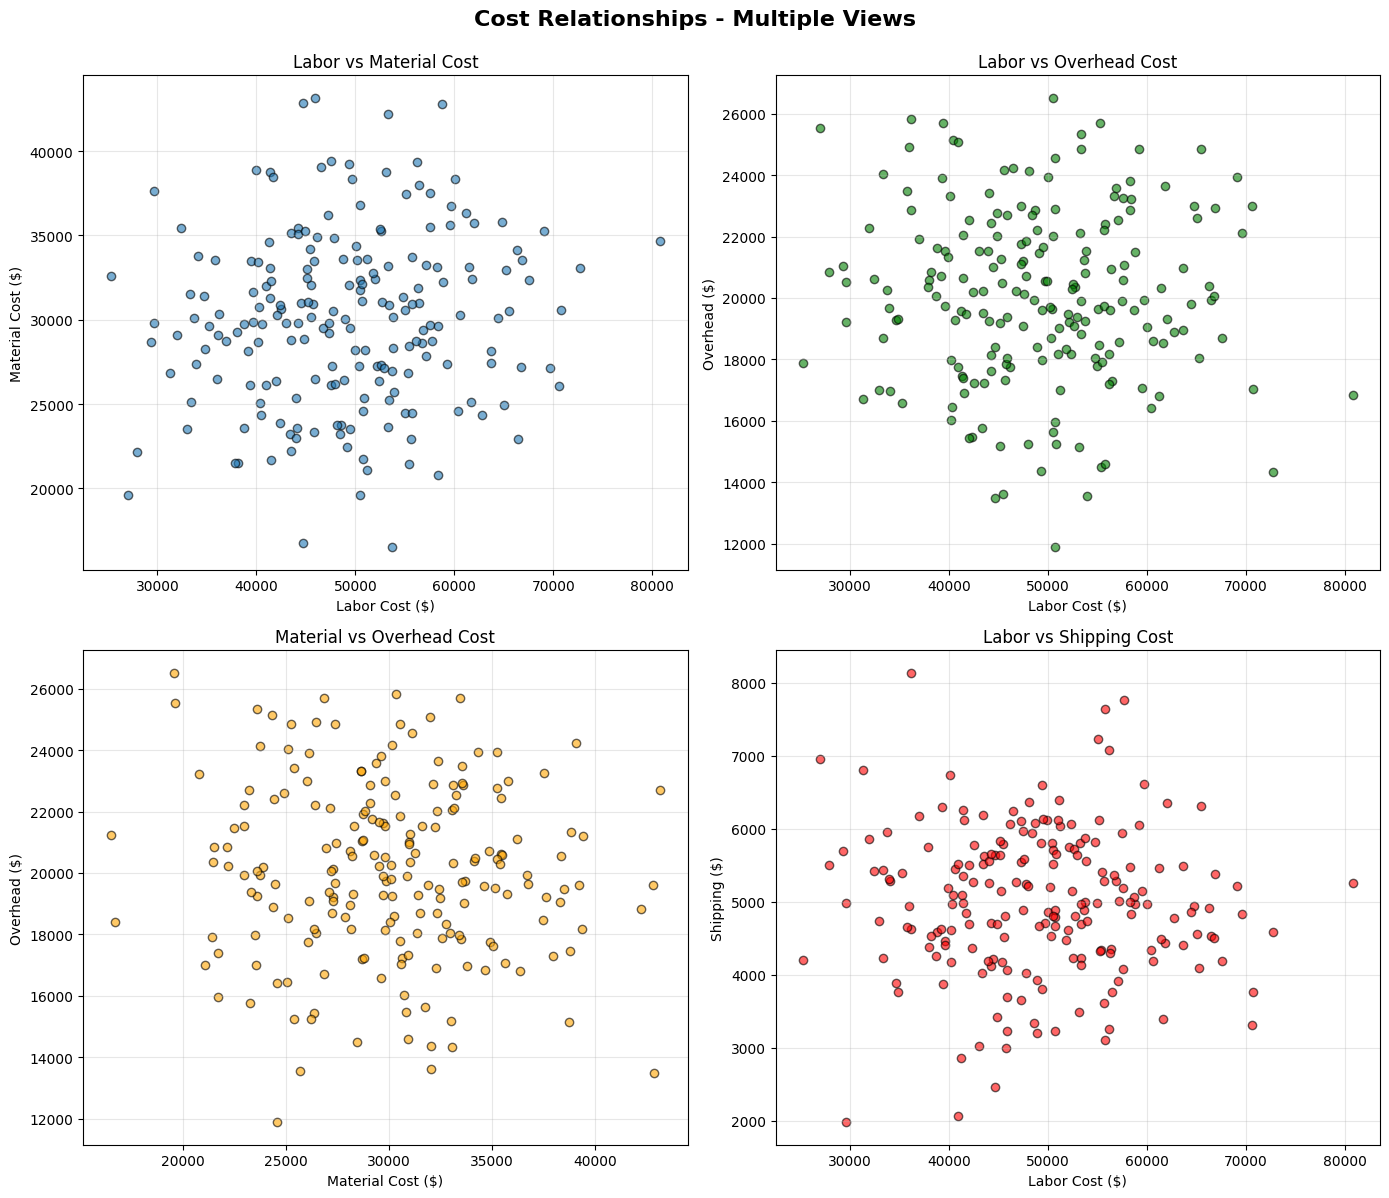

In [18]:
# Generate additional variables
df['overhead'] = np.random.normal(20000, 3000, len(df))
df['shipping'] = np.random.normal(5000, 1000, len(df))

# Create 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Labor vs Material
axes[0, 0].scatter(df['labor_cost'], df['material_cost'], alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Labor Cost ($)')
axes[0, 0].set_ylabel('Material Cost ($)')
axes[0, 0].set_title('Labor vs Material Cost')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Labor vs Overhead
axes[0, 1].scatter(df['labor_cost'], df['overhead'], alpha=0.6,
                   edgecolors='black', color='green')
axes[0, 1].set_xlabel('Labor Cost ($)')
axes[0, 1].set_ylabel('Overhead ($)')
axes[0, 1].set_title('Labor vs Overhead Cost')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Material vs Overhead
axes[1, 0].scatter(df['material_cost'], df['overhead'], alpha=0.6,
                   edgecolors='black', color='orange')
axes[1, 0].set_xlabel('Material Cost ($)')
axes[1, 0].set_ylabel('Overhead ($)')
axes[1, 0].set_title('Material vs Overhead Cost')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Labor vs Shipping
axes[1, 1].scatter(df['labor_cost'], df['shipping'], alpha=0.6,
                   edgecolors='black', color='red')
axes[1, 1].set_xlabel('Labor Cost ($)')
axes[1, 1].set_ylabel('Shipping ($)')
axes[1, 1].set_title('Labor vs Shipping Cost')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Cost Relationships - Multiple Views', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Pair Plots (Pairwise Scatter Plots) ⭐
Basic Pair Plot with Seaborn


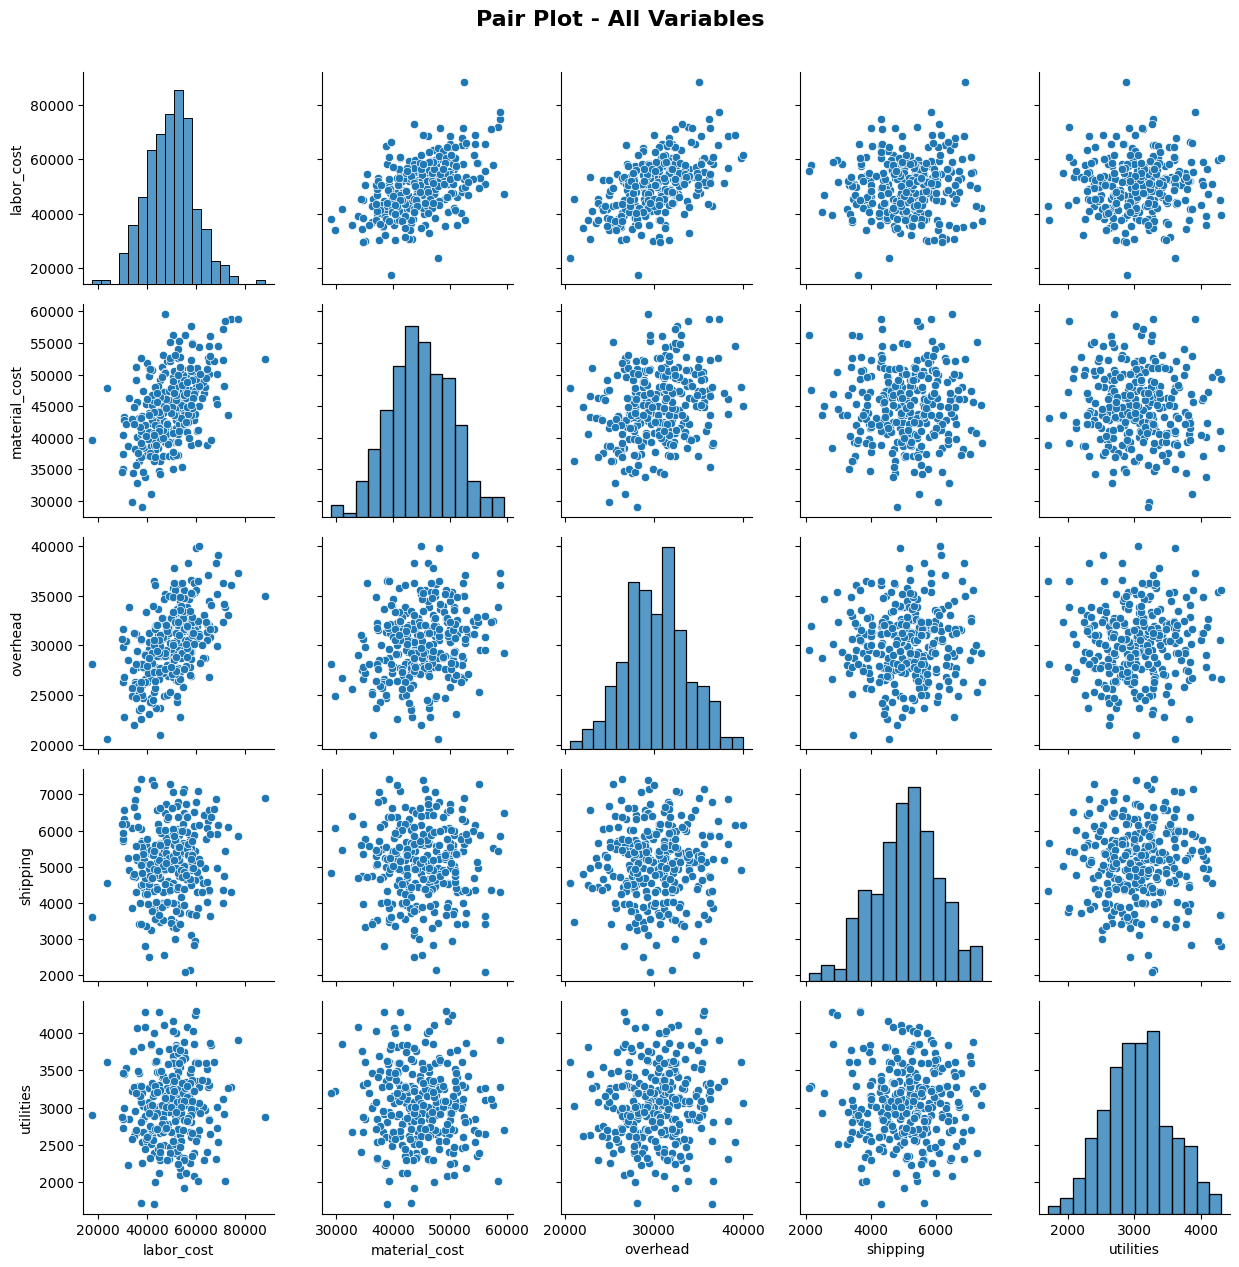

In [13]:
# Generate comprehensive dataset
np.random.seed(42)
n = 300

df_full = pd.DataFrame({
    'labor_cost': np.random.normal(50000, 10000, n),
    'material_cost': np.random.normal(30000, 5000, n),
    'overhead': np.random.normal(20000, 3000, n),
    'shipping': np.random.normal(5000, 1000, n),
    'utilities': np.random.normal(3000, 500, n),
    'department': np.random.choice(['Engineering', 'Operations', 'Sales'], n)
})

# Add correlations
df_full['material_cost'] += 0.3 * df_full['labor_cost']
df_full['overhead'] += 0.2 * df_full['labor_cost']

# Basic pair plot
sns.pairplot(df_full)
plt.suptitle('Pair Plot - All Variables', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair Plot with Categories

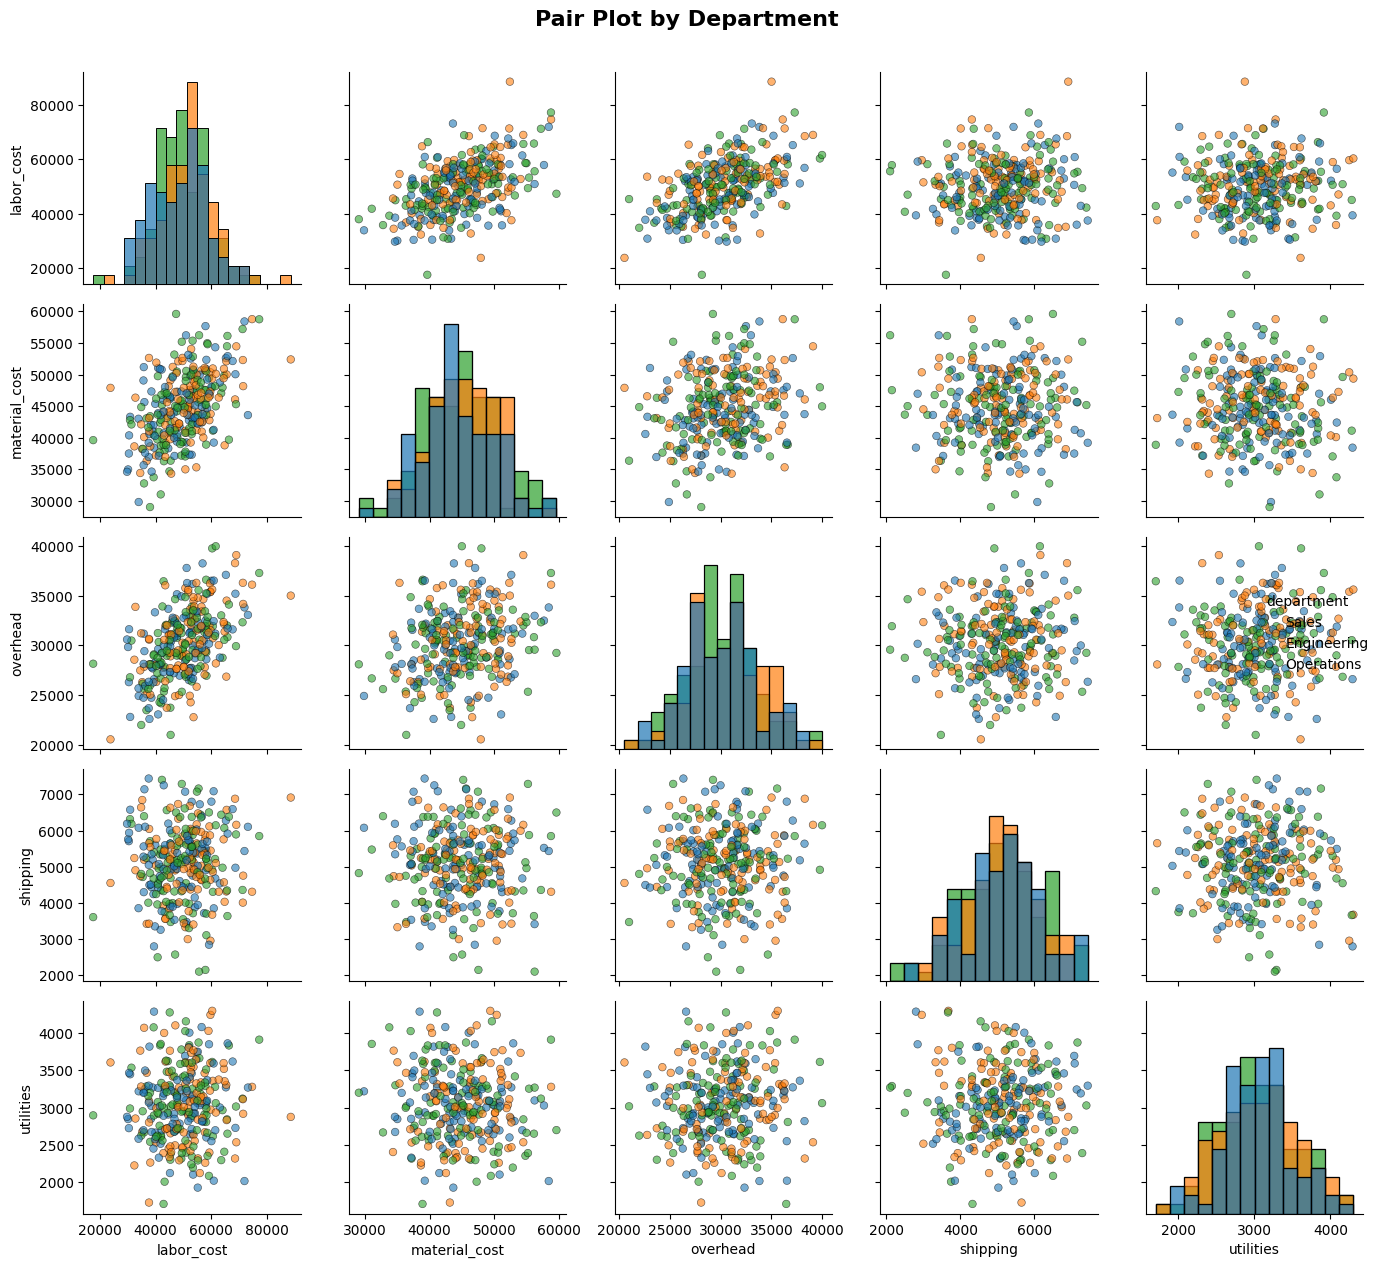

In [14]:
# Pair plot colored by department
sns.pairplot(
    df_full,
    hue='department',           # Color by department
    diag_kind='hist',           # Histograms on diagonal
    plot_kws={'alpha': 0.6, 'edgecolor': 'black', 's': 30},
    diag_kws={'edgecolor': 'black', 'alpha': 0.7}
)
plt.suptitle('Pair Plot by Department', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair Plot with KDE on Diagonal


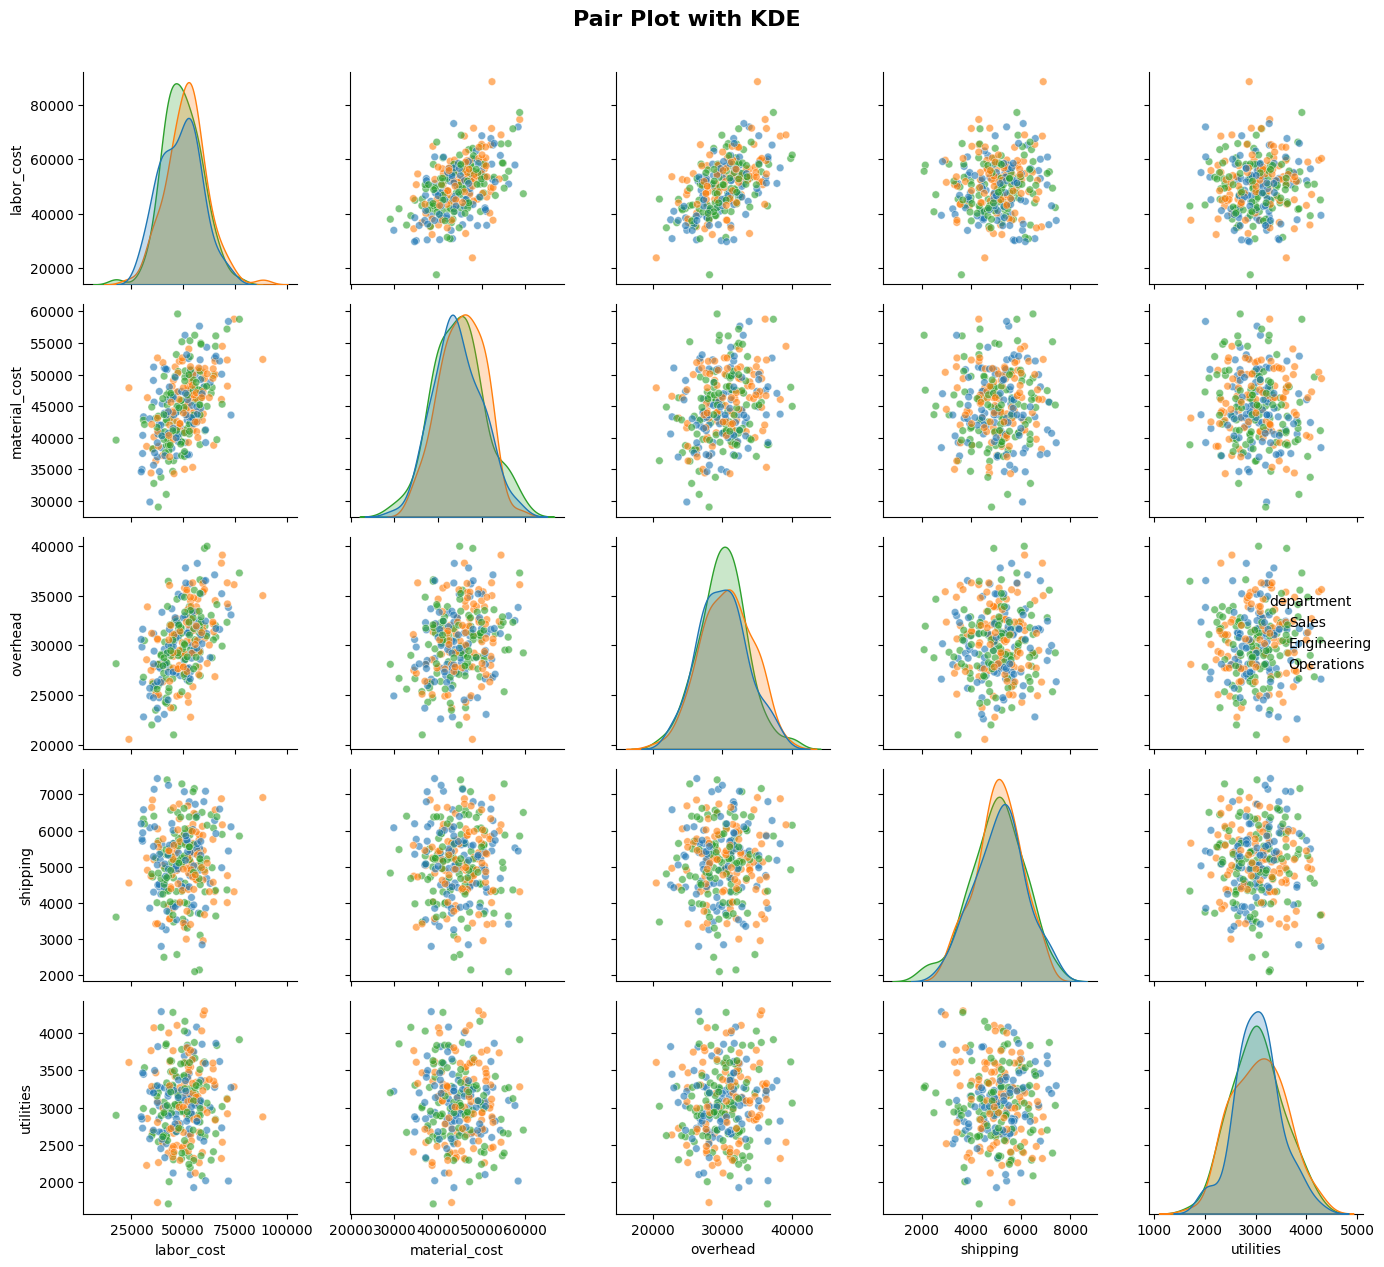

In [15]:
# Use KDE (Kernel Density Estimation) instead of histograms
sns.pairplot(
    df_full,
    hue='department',
    diag_kind='kde',            # KDE on diagonal
    plot_kws={'alpha': 0.6, 's': 30},
    corner=False                # Show all plots (not just lower triangle)
)
plt.suptitle('Pair Plot with KDE', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair Plot - Lower Triangle Only (Corner Plot)


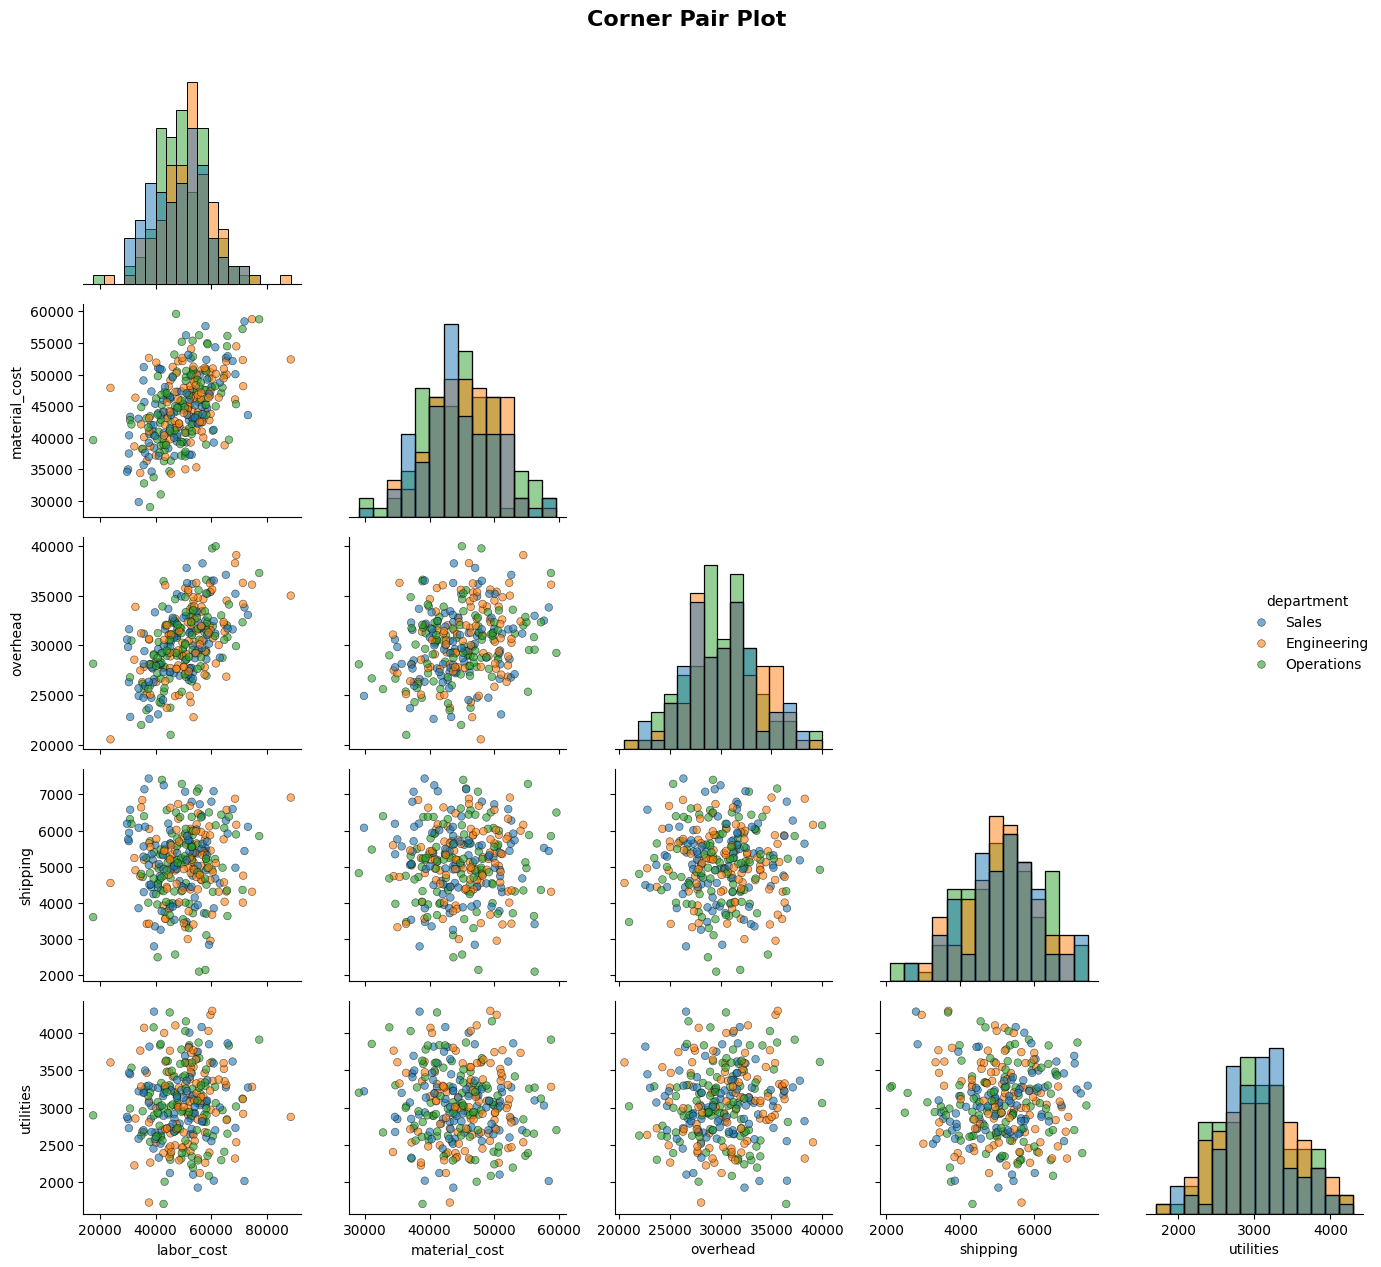

In [16]:
# Show only lower triangle to reduce redundancy
sns.pairplot(
    df_full,
    hue='department',
    diag_kind='hist',
    corner=True,                # Show only lower triangle
    plot_kws={'alpha': 0.6, 'edgecolor': 'black', 's': 30}
)
plt.suptitle('Corner Pair Plot', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Customized Pair Plot


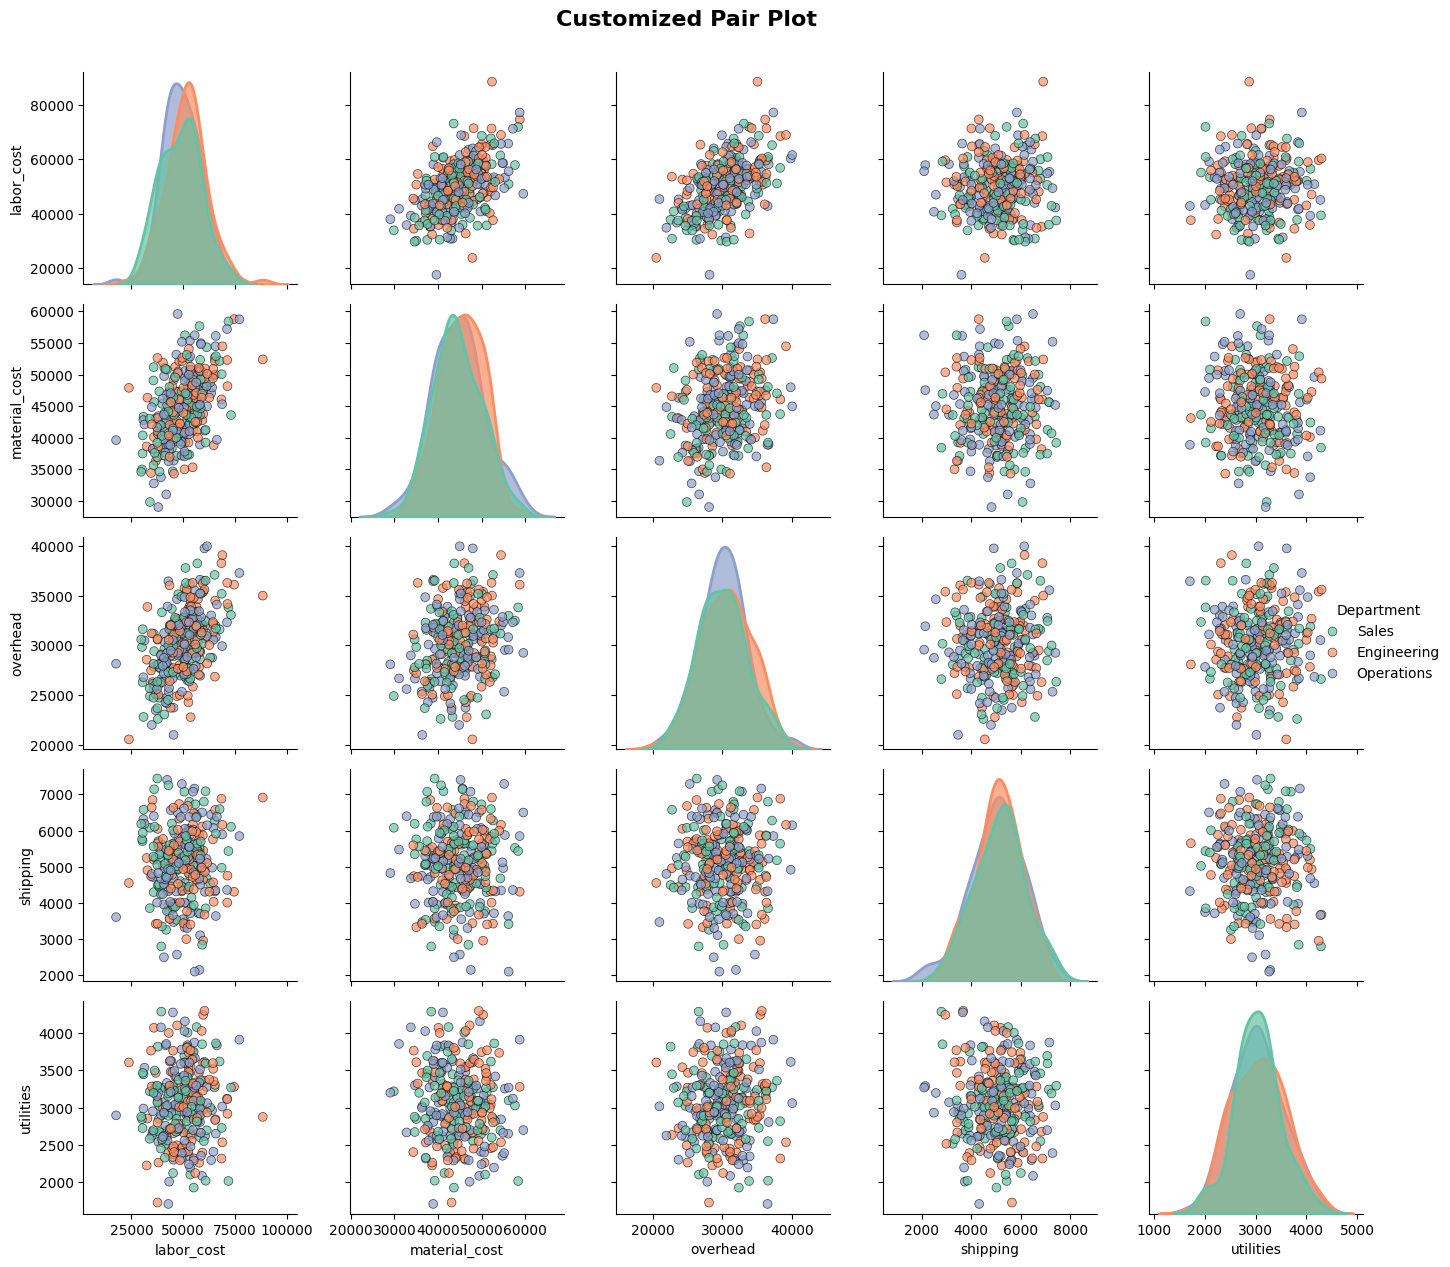

In [19]:
# More control over appearance
g = sns.pairplot(
    df_full,
    hue='department',
    palette='Set2',             # Color palette
    diag_kind='kde',
    height=2.5,                 # Size of each subplot
    aspect=1,                   # Aspect ratio
    plot_kws={
        'alpha': 0.7,
        'edgecolor': 'black',
        'linewidth': 0.5,
        's': 40
    },
    diag_kws={
        'alpha': 0.7,
        'linewidth': 2
    }
)

# Customize legend
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_title('Department')

plt.suptitle('Customized Pair Plot', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Advanced: Pair Plot with Pandas


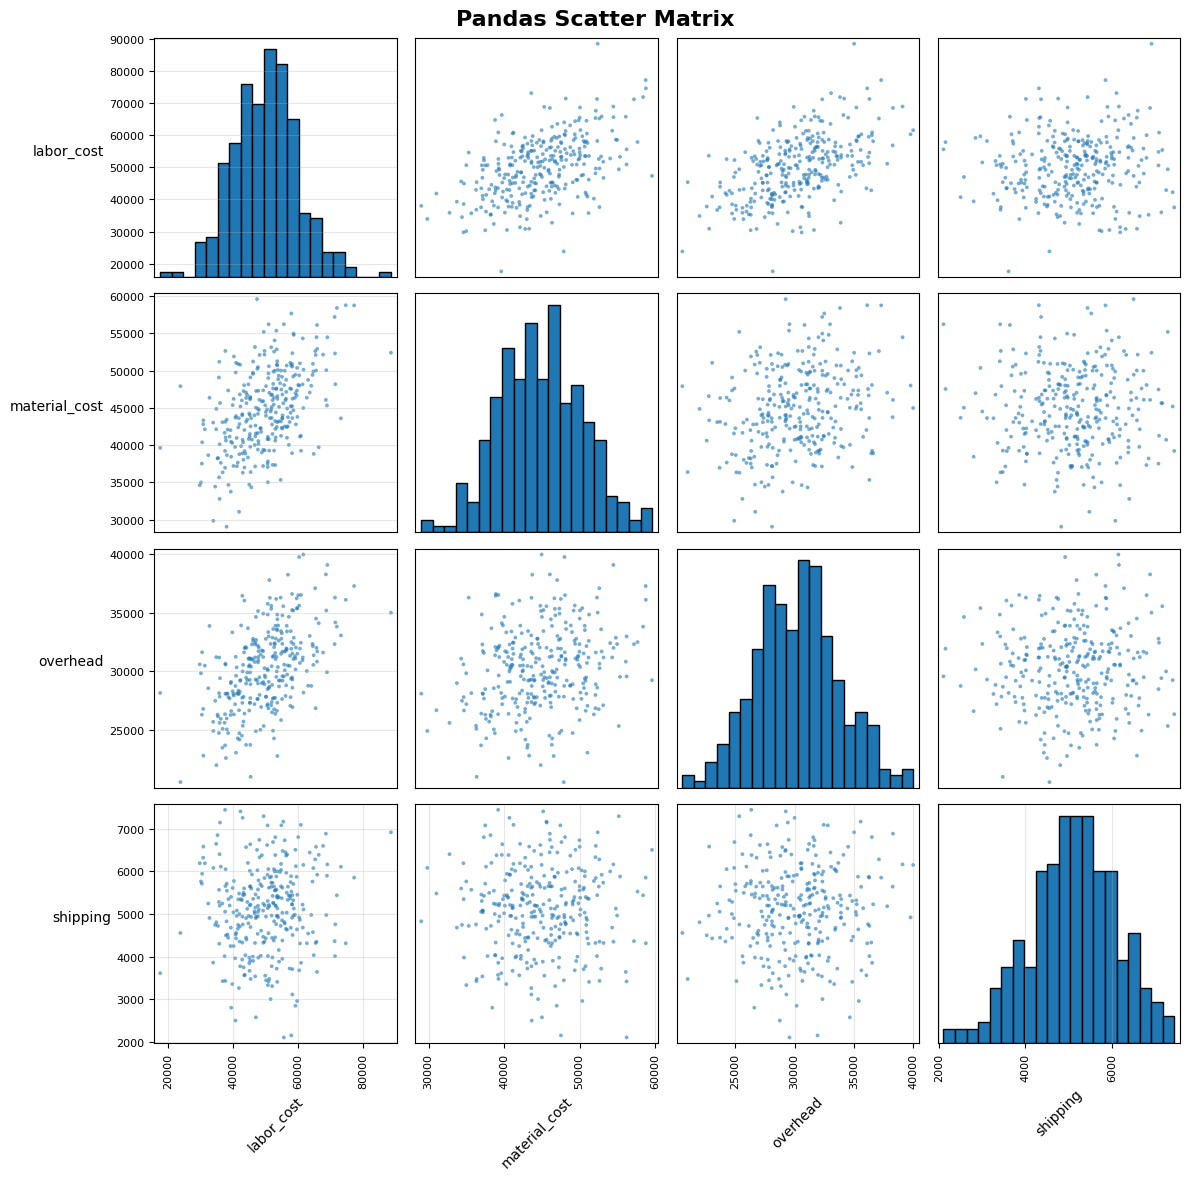

In [21]:
# Manual pair plot using pandas scatter_matrix
from pandas.plotting import scatter_matrix
cost_columns = ['labor_cost', 'material_cost', 'overhead', 'shipping']

# Create scatter matrix
axes = scatter_matrix(
    df_full[cost_columns],
    figsize=(12, 12),
    alpha=0.6,
    diagonal='hist',            # or 'kde'
    hist_kwds={'bins': 20, 'edgecolor': 'black'},
    s=30
)

# Customize each subplot
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.grid(alpha=0.3)

plt.suptitle('Pandas Scatter Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Advanced: Pair Plot with Pandas


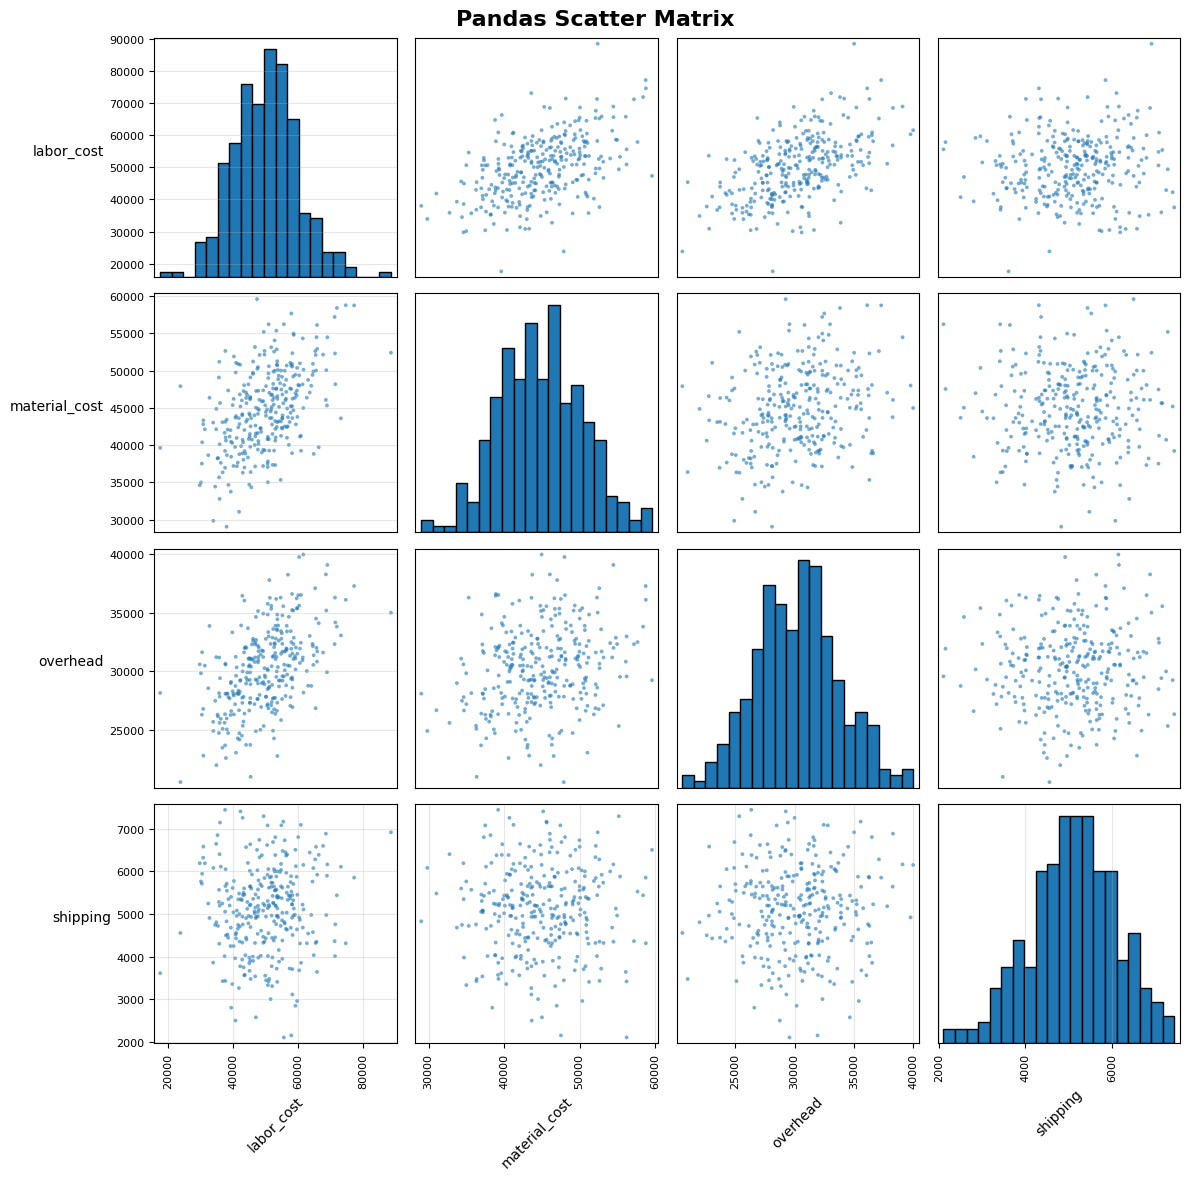

In [22]:
# Manual pair plot using pandas scatter_matrix
from pandas.plotting import scatter_matrix

# Create scatter matrix
axes = scatter_matrix(
    df_full[cost_columns],
    figsize=(12, 12),
    alpha=0.6,
    diagonal='hist',            # or 'kde'
    hist_kwds={'bins': 20, 'edgecolor': 'black'},
    s=30
)

# Customize each subplot
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.grid(alpha=0.3)

plt.suptitle('Pandas Scatter Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair Plot with Regression Lines


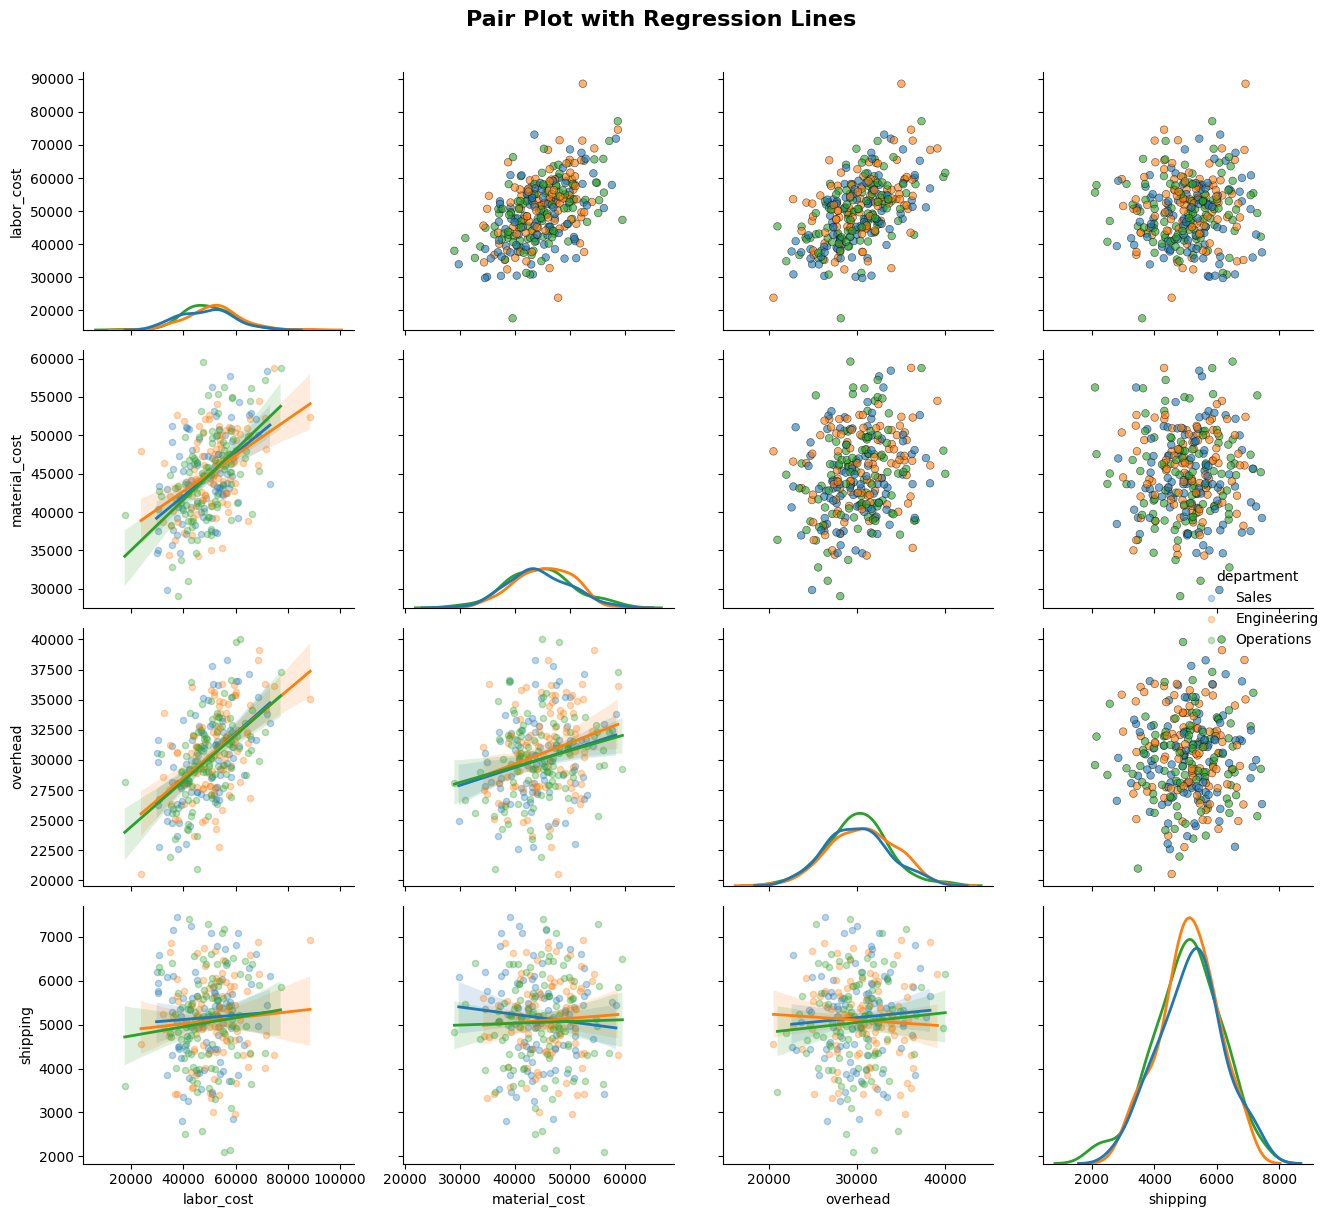

In [23]:
# Pair plot with regression lines
g = sns.PairGrid(
    df_full,
    hue='department',
    vars=cost_columns,
    height=3,
    aspect=1
)

# Upper triangle: scatter plots
g.map_upper(sns.scatterplot, alpha=0.6, edgecolor='black', s=30)

# Diagonal: KDE plots
g.map_diag(sns.kdeplot, linewidth=2)

# Lower triangle: scatter + regression
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.3, 's': 20},
            line_kws={'linewidth': 2})

# Add legend
g.add_legend()

plt.suptitle('Pair Plot with Regression Lines', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifying Patterns in Pair Plots


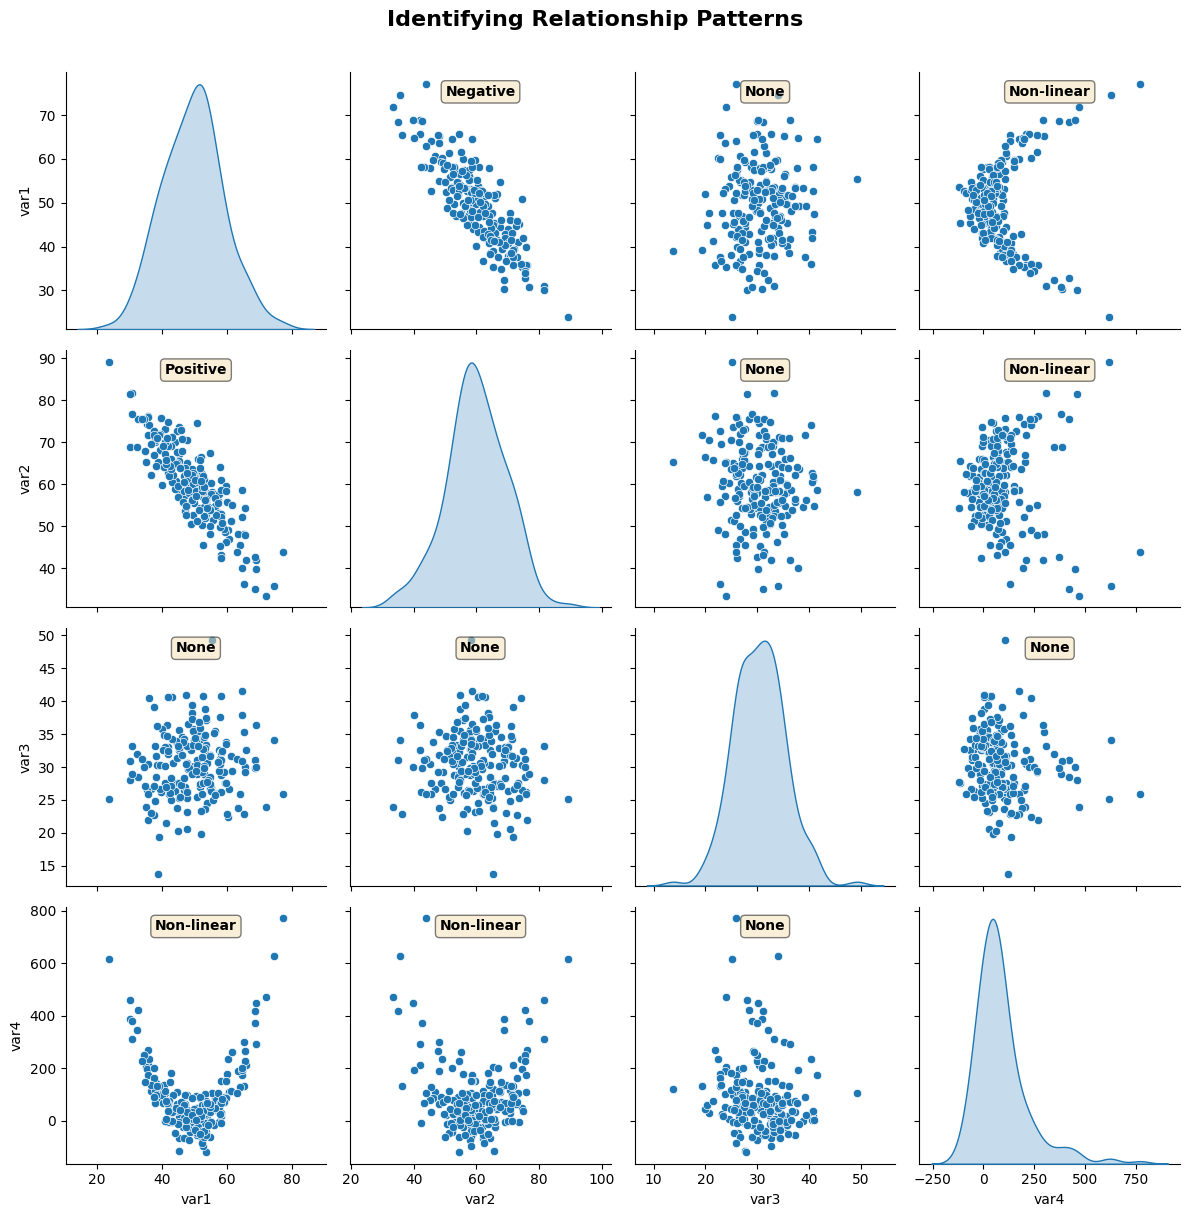

In [24]:
# Generate data with clear patterns
np.random.seed(42)
n = 200

# Create different relationship types
df_patterns = pd.DataFrame({
    # Positive correlation
    'var1': np.random.normal(50, 10, n),
    # Negative correlation
    'var2': None,
    # No correlation
    'var3': np.random.normal(30, 5, n),
    # Non-linear relationship
    'var4': None
})

df_patterns['var2'] = 100 - 0.8 * df_patterns['var1'] + np.random.normal(0, 5, n)
df_patterns['var4'] = (df_patterns['var1'] - 50)**2 + np.random.normal(0, 50, n)

# Create pair plot
g = sns.pairplot(df_patterns, diag_kind='kde', height=3)

# Add titles to describe patterns
titles = [
    ['var1', 'Negative', 'None', 'Non-linear'],
    ['Positive', 'var2', 'None', 'Non-linear'],
    ['None', 'None', 'var3', 'None'],
    ['Non-linear', 'Non-linear', 'None', 'var4']
]

for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if i != j:
            ax.text(0.5, 0.95, titles[i][j],
                   transform=ax.transAxes,
                   ha='center', va='top',
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Identifying Relationship Patterns', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Highlighting Anomalies in Scatter Plots


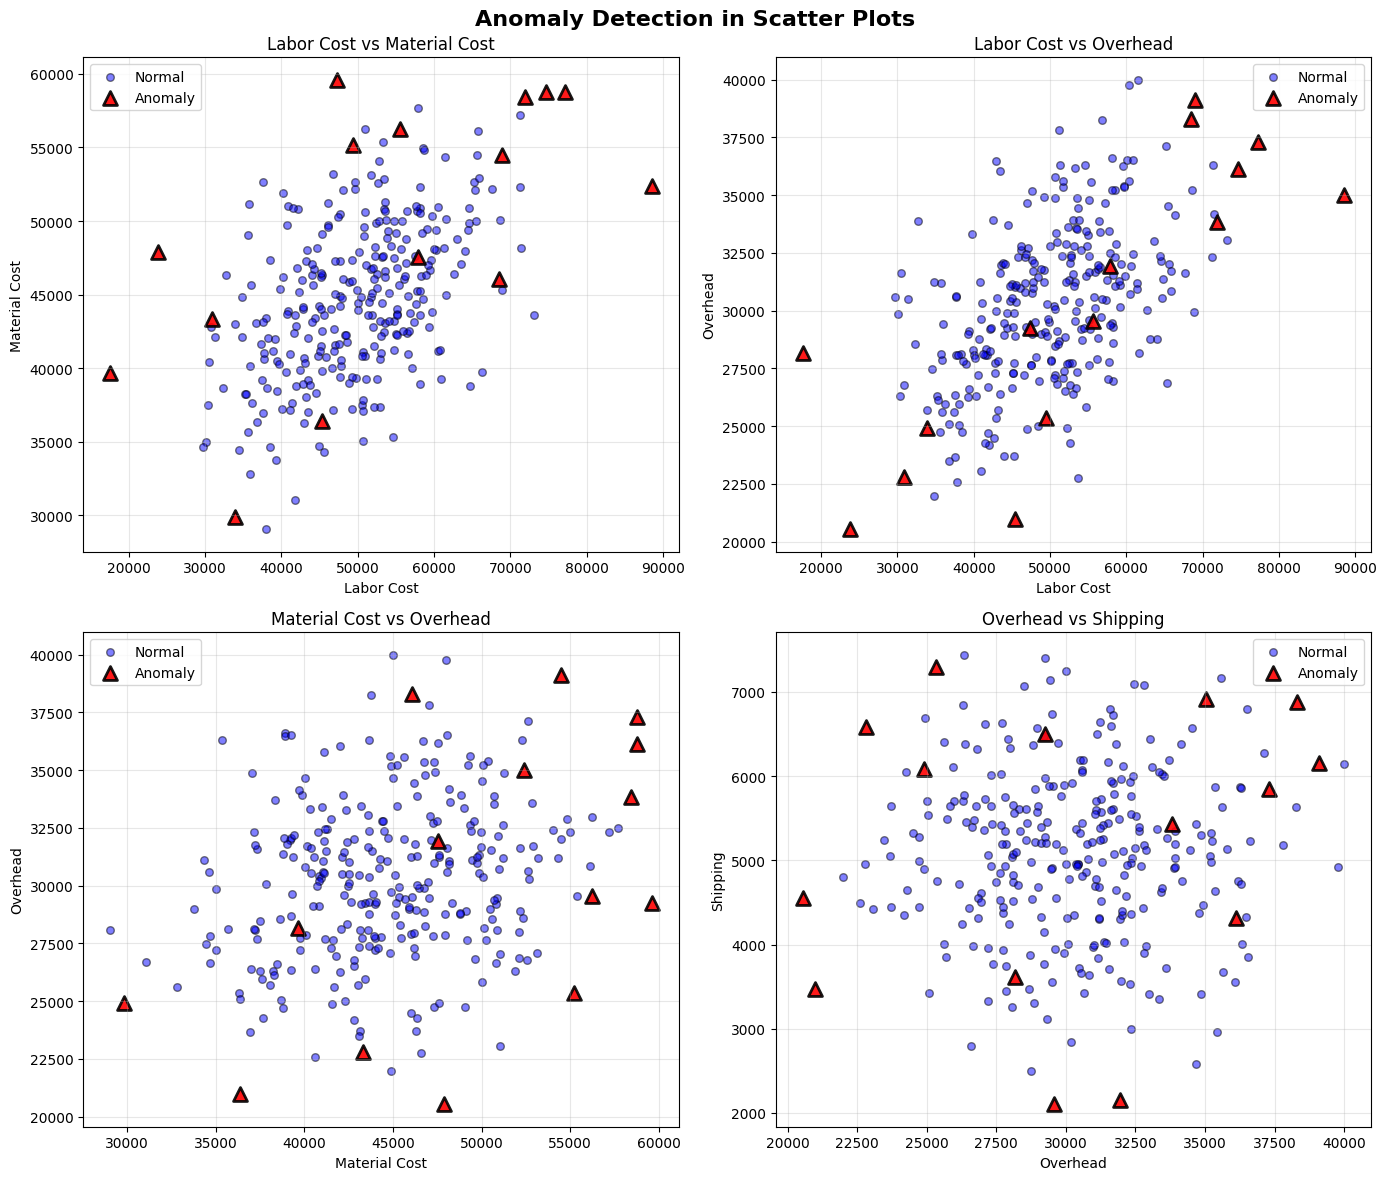

Total anomalies detected: 15


In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

# Detect anomalies
features = ['labor_cost', 'material_cost', 'overhead', 'shipping']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_full[features])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_full['anomaly'] = iso_forest.fit_predict(X_scaled)
df_full['is_anomaly'] = df_full['anomaly'] == -1

# Scatter plot highlighting anomalies
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plot_pairs = [
    ('labor_cost', 'material_cost'),
    ('labor_cost', 'overhead'),
    ('material_cost', 'overhead'),
    ('overhead', 'shipping')
]

for idx, (x_var, y_var) in enumerate(plot_pairs):
    ax = axes[idx // 2, idx % 2]

    # Plot normal points
    normal = df_full[~df_full['is_anomaly']]
    anomalies = df_full[df_full['is_anomaly']]

    ax.scatter(normal[x_var], normal[y_var],
              alpha=0.5, c='blue', s=30, label='Normal', edgecolors='black')
    ax.scatter(anomalies[x_var], anomalies[y_var],
              alpha=0.9, c='red', s=100, label='Anomaly',
              edgecolors='black', linewidth=2, marker='^')

    ax.set_xlabel(x_var.replace('_', ' ').title())
    ax.set_ylabel(y_var.replace('_', ' ').title())
    ax.set_title(f'{x_var.replace("_", " ").title()} vs {y_var.replace("_", " ").title()}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Anomaly Detection in Scatter Plots', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total anomalies detected: {df_full['is_anomaly'].sum()}")

# Interactive Scatter Plots with Plotly


In [27]:
import plotly.express as px
import plotly.graph_objects as go

# Interactive scatter matrix
fig = px.scatter_matrix(
    df_full,
    dimensions=['labor_cost', 'material_cost', 'overhead', 'shipping'],
    color='department',
    title='Interactive Pair Plot',
    height=800
)

fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

3D Scatter Plot


In [30]:
# Add project_size if not exists
if 'project_size' not in df_full.columns:
    df_full['project_size'] = np.random.uniform(10, 100, len(df_full))

# 3D scatter plot for three variables
fig = px.scatter_3d(
    df_full,
    x='labor_cost',
    y='material_cost',
    z='overhead',
    color='department',
    size='project_size',
    hover_data=['shipping', 'utilities'],
    title='3D Cost Analysis'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Labor Cost ($)',
        yaxis_title='Material Cost ($)',
        zaxis_title='Overhead ($)'
    ),
    height=700
)

fig.show()

Adding Marginal Distributions


In [31]:
# Scatter plot with marginal histograms
fig = px.scatter(
    df_full,
    x='labor_cost',
    y='material_cost',
    color='department',
    marginal_x='histogram',     # Add histogram on x-axis
    marginal_y='box',           # Add box plot on y-axis
    title='Scatter Plot with Marginal Distributions'
)

fig.update_layout(height=700)
fig.show()

# Correlation Strength Visualization


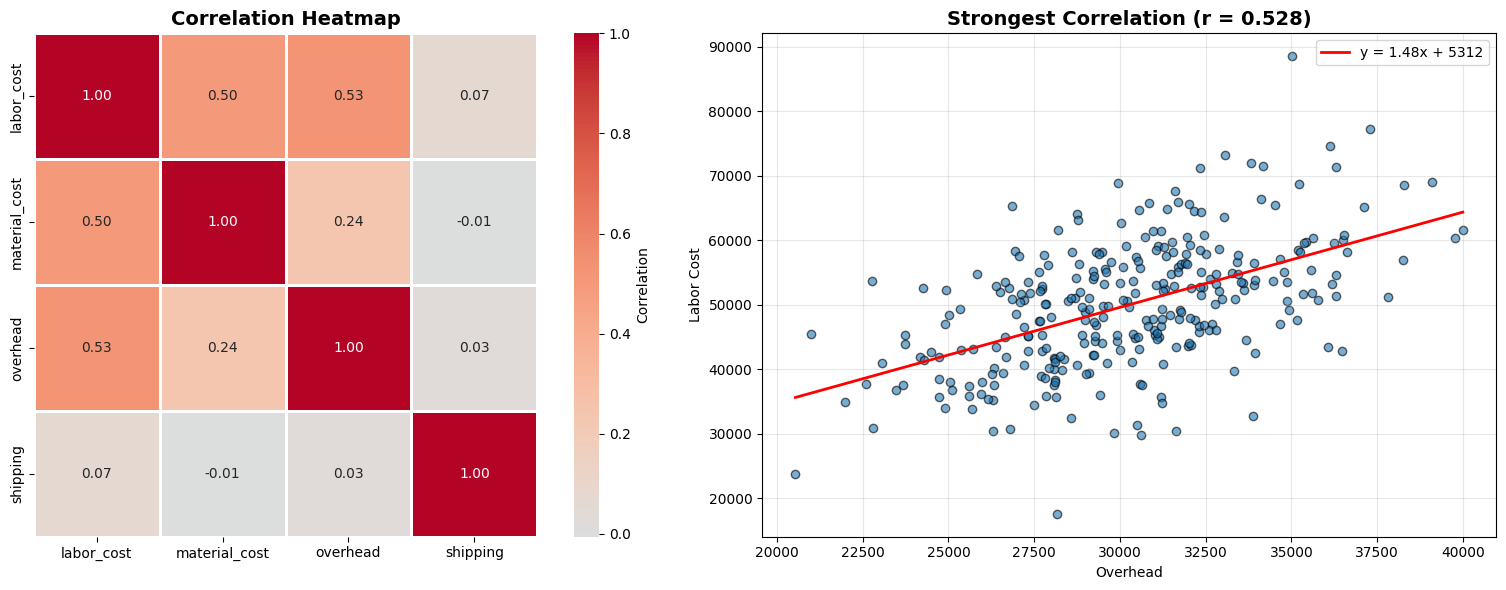

In [32]:
# Calculate correlations and visualize
correlation_matrix = df_full[features].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Scatter plot of strongest correlation
# Find strongest correlation (excluding diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_corr = correlation_matrix.mask(mask)
max_corr_idx = masked_corr.abs().stack().idxmax()

x_var, y_var = max_corr_idx
corr_value = correlation_matrix.loc[x_var, y_var]

ax2.scatter(df_full[x_var], df_full[y_var], alpha=0.6, edgecolors='black')
ax2.set_xlabel(x_var.replace('_', ' ').title())
ax2.set_ylabel(y_var.replace('_', ' ').title())
ax2.set_title(f'Strongest Correlation (r = {corr_value:.3f})',
             fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

# Add regression line
slope, intercept, r_val, _, _ = stats.linregress(df_full[x_var], df_full[y_var])
line_x = np.array([df_full[x_var].min(), df_full[x_var].max()])
line_y = slope * line_x + intercept
ax2.plot(line_x, line_y, 'r-', linewidth=2,
        label=f'y = {slope:.2f}x + {intercept:.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

When to Use Scatter Plots vs Pair Plots
Use Scatter Plots when:

✅ Examining relationship between two specific variables
✅ Need detailed view of one relationship
✅ Adding annotations, trend lines, confidence intervals
✅ Comparing groups with different colors/shapes
✅ Highlighting specific points (outliers, important records)
✅ Creating presentation-ready visualizations

Use Pair Plots when:

✅ Exploratory analysis of multivariate data
✅ Want to see all pairwise relationships at once
✅ Identifying which variables to investigate further
✅ Quick overview of correlations and distributions
✅ Comparing patterns across multiple groups
✅ Feature selection for modeling

Best Practices
✅ Do:

Use alpha transparency for overlapping points
Add edge colors to make points more visible
Include regression lines for correlation assessment
Color by category to reveal group patterns
Use appropriate size for point markers (30-60 pixels)
Add grid for easier value reading
Label axes clearly with units
Sample large datasets (>10,000 points) for pair plots

❌ Don't:

Overplot - too many points obscure patterns
Use tiny points - hard to see patterns
Forget to scale data with very different ranges
Use 3D unnecessarily - 2D usually clearer
Create pair plots with 10+ variables - becomes unreadable
Skip checking for outliers - they distort visualizations

Summary
TechniqueBest ForLibraryComplexityBasic ScatterTwo variables, simple relationshipmatplotlib⭐Seaborn ScatterStyled plots, categoriesseaborn⭐⭐Pair PlotAll pairwise relationshipsseaborn⭐⭐Interactive PlotlyExploration, dashboardsplotly⭐⭐⭐3D ScatterThree variablesplotly⭐⭐⭐Custom PairGridAdvanced pair plotsseaborn⭐⭐⭐
For anomaly detection:

Use scatter plots to visualize bivariate outliers
Use pair plots to find which variable combinations show anomalies
Color anomalies differently for clear identification
Combine with statistical methods for robust detection

Scatter plots and pair plots are fundamental tools for understanding multivariate relationships and are essential for any comprehensive EDA workflow!